In [8]:
Image(url='https://s3-ap-northeast-2.amazonaws.com/opentutorials-user-file/module/3653/9840.png', width=700)

In [9]:
Image(url='https://git.io/Jtm22', width=500)

예측 확률 : $\hat{y}=\begin{cases}1&\phi(z)\ge 0.5\mbox{ 일 때} \\ 0&\mbox{그 외}\end{cases}$
$\;\;\;\;\;$
$\hat y=\begin{cases}1&z\ge 0\mbox{ 일 때} \\ 0&\mbox{그 외}\end{cases}$

- 시그모이드 함수의 출력, 즉 $\phi (z)$의 실수값은 '특정 샘플이 클래스 1에 속할 확률'이라고 해석한다.

### 로지스틱 비용 함수의 가중치 학습
**가능도** : $L(\boldsymbol w)=\prod^n_{i=1}P(y^{(i)} | x^{(i)};w)=\prod^n_{i=1}\phi(z^{(i)})^{y^{(i)}}\left(1-\phi(z^{(i)})\right)^{1-y^{(i)}}$ <br>

- n개의 샘플이 해당 클래스에 속할 확률을 곱한 것이 가능도
    - 양성 샘플일 경우 $1-y^{(i)}$가 1이 되어 두 번째 항이 0이 되고, 반대로 음성 샘플일 때는 $1-y^{(i)}$가 0이 된다.
    - 따라서.. 가능도가 최대가 되려면 양성 샘플의 $\phi(z^{(i)})$는 가능한 크고, 음성 샘플의 $\phi(z^{(i)})$는 가능한 작아야 한다.

로그 가능도 : $\text{log} L(\boldsymbol w)=\sum^n_{i=1}\left[y^{(i)}\text{log}\phi(z^{(i)})+(1-y^{(i)})\text{log}\left(1-\phi(z^{(i)})\right)\right]$<br>

- 로그 함수를 적용하면 가능도가 매우 작을 때 일어나는 수치상의 언더플로(underflow)를 미연에 방지한다.
- 계수의 곱을 계수의 합으로 바꿀 수 있다.
- 미적분 하기 쉽다
- 경사상승법 같은 최적화 알고리즘을 이용하면 이 로그 가능도 함수를 최대화할 수 있다.

로지스틱 비용 함수 : $J(\boldsymbol w)=\sum^n_{i=1}\left[-y^{(i)}\text{log}\phi(z^{(i)})-(1-y^{(i)})\text{log}\left(1-\phi(z^{(i)})\right)\right]$<br>

- 또는.. 로그 가능도 함수를 비용함수 J로 표현하여(로그가능도 함수에 마이너스 부호) 경사 하강법을 사용하여 최소화할 수도 있다.

손실 계산 : $J(\boldsymbol w)=\begin{cases}-\text{log}\phi(z)&y=1\mbox{ 일 때} \\ -\text{log}(1-\phi(z))&y=0\mbox{일 때}\end{cases}$<br>

- y가 1이면 두 번째 항이 0이 되고,
- y가 0이면 첫 번째 항이 0이 된다.<br>

> 기억할 점이.. $w^Tx$ 에다가 sigmoid function을 적용시켜서 $\phi(z)$ 을 만들어 내는데, $\phi(z)$는 '양성 클래스일 확률'이다.<br>

> 그리고 이 activation function 값과 실제 레이블 값을 비교하는 '비용 함수'가 있어야 한다. 이 비용 함수를 정의하기 위한 시작이 '가능도 함수'다.<br>

> 가능도는.. "샘플데이터 x와 가중치 w가 주어졌을 때, y가 양성 레이블일 확률은 얼마냐?" 는 질문에 대한 답이다. 예를 들어, sigmoid(샘플데이터\*가중치) 값인 $\phi(z)$가 엄청 높은데 실제 레이블 값이 음성이면.. 가능도는 엄청나게 낮아질 것이다.<br>

> 이 가능도 함수를 편리함을 위해 '로그'를 씌워준다. 그리고 이 로그 가능도 함수는 '단조증가 함수'기 때문에, 최대화 시키려면 경사 상승법 같은 걸 써야 하는데; 그냥 우리는 이 로그 가능도 함수에 마이너스를 붙여줘서 이걸 '비용 함수', 즉 '로지스틱 비용 함수'로 만들어주고 경사 하강법으로 최적화할 수 있는 것이다.

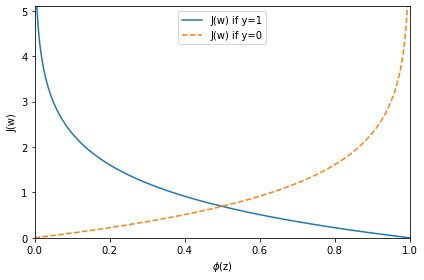

In [12]:
# 샘플이 하나인 경우 phi(z)값에 대한 분류 비용 그려보기
Image(filename='/Users/jihun/Documents/data_science/notebooks/mlbook_raschka/image/logistic.png', width=450)

- 클래스 1에 속한 샘플을 정확히 예측하면 비용이 0에 가까워지고, 클래스 0에 속한 샘플을 y=0으로 정확히 예측하면 y축의 비용이 0에 가까워 진다.
- 예측이 잘못되면 비용이 무한대가 된다.
    - "잘못된 예측에 점점 더 큰 비용을 부여한다는 점이 중요하다."

### 아달린 구현을 로지스틱 회귀 알고리즘으로 변경

로지스틱 손실 함수의 미분 :

$\begin{align*}
\dfrac{\partial}{\partial w_j}J(\boldsymbol w)&=-\dfrac{\partial}{\partial w_j}\left[y^{(i)}\text{log}\phi(z^{(i)})+(1-y^{(i)})\text{log}\left(1-\phi(z^{(i)})\right)\right] \\
&=-y^{(i)}\dfrac{\partial}{\partial w_j}\text{log}\phi(z^{(i)})-(1-y^{(i)})\dfrac{\partial}{\partial w_j}\text{log}\left(1-\phi(z^{(i)})\right) \\
&=-y^{(i)}\dfrac{1}{\phi(z^{(i)})}\dfrac{\partial}{\partial w_j}\phi(z^{(i)})+(1-y^{(i)})\dfrac{1}{\left(1-\phi(z^{(i)})\right)}\dfrac{\partial}{\partial w_j}\phi(z^{(i)}) \\
&=\left(-y^{(i)}\dfrac{1}{\phi(z^{(i)})}+(1-y^{(i)})\dfrac{1}{\left(1-\phi(z^{(i)})\right)}\right)\dfrac{\partial}{\partial w_j}\phi(z^{(i)}) \\
\end{align*}$

시그모이드 함수를 z에 대해 미분하면 :

$\dfrac{\partial}{\partial z}\phi(z)=\dfrac{\partial}{\partial z}\left(\dfrac{1}{1+e^{-z}}\right)=-\dfrac{1}{(1+e^{-z})^2}(-e^{-z})=\dfrac{1+e^{-z}-1}{(1+e^{-z})^2}=\dfrac{1+e^{-z}}{(1+e^{-z})^2}-\dfrac{1}{(1+e^{-z})^2}=\dfrac{1}{1+e^{-z}}\left(1-\dfrac{1}{1+e^{-z}}\right)=\phi(z)(1-\phi(z))$

따라서,

$\begin{align*}
\dfrac{\partial}{\partial w_j}J(\boldsymbol w)&=\left(-y^{(i)}\dfrac{1}{\phi(z^{(i)})}+(1-y^{(i)})\dfrac{1}{\left(1-\phi(z^{(i)})\right)}\right)\phi(z^{(i)})\left(1-\phi(z^{(i)})\right)\dfrac{\partial}{\partial w_j}z^{(i)} \\
&=\left(-y^{(i)}\left(1-\phi(z^{(i)})\right)+(1-y^{(i)})\phi(z^{(i)})\right)x_j^{(i)}\\
&=\left(-y^{(i)}+y^{(i)}\phi(z^{(i)})+\phi(z^{(i)})-y^{(i)}\phi(z^{(i)})\right)x_j^{(i)}\\
&=-\left(y^{(i)}-\phi(z^{(i)})\right)x_j^{(i)}
\end{align*}$

> 결국.. J(w)의 negative gradient는 "(실제클래스값 - 시그모이드출력값) 곱하기 샘플데이터" 에다가 마이너스 부호 붙인 거다. 여기다가 learning rate를 곱한 것을 가중치에 빼면 '업데이트된 가중치'가 된다.

### Logistic Regression 직접 구현

In [13]:
class LogisticRegressionGD(object):
    """경사 하강법을 사용한 로지스틱 회귀 분류기

    매개변수
    ----------
    eta : float
      학습률
    n_iter : int
    random_state : int

    속성
    ----------
    w_ : 1d-array
      학습된 가중치
    cost_ : list
      에포크마다 누적된 로지스틱 비용 함수 값
    """
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size= 1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()

            # 오차 제곱합 대신 로지스틱 비용을 계산한다.
            cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)

#### threshold에 따른 성능지표 비교 후 가장 높은 ACC 반납하는 함수 만들기

In [30]:

def cut_off(y, threshold):
    Y = y.copy()  # copy함수를 사용하여 이전의 y값이 변하지 않게 함
    # Y: 0 혹은 1의 예측값,    y: 0~1 사이 실수 예측값
    Y[Y > threshold] = 1
    Y[Y <= threshold] = 0
    return(Y.astype(int))


def acc(cfmat):
    acc = (cfmat[0,0] + cfmat[1,1]) / (cfmat[0,0] + cfmat[1,1] + cfmat[0,1] + cfmat[1,0])
    return acc



threshold = np.arange(0, 1, 0.1)
table = pd.DataFrame(columns=['ACC'])
result = []
for i in threshold:
    pred_Y = cut_off(pred_y, i)
    cfmat = confusion_matrix(test_y, pred_Y)
    table.loc[i] = acc(cfmat)
table.index.name = 'threshold'
table.columns.name = 'performance'
table



performance,ACC
threshold,
0.0,0.102667
0.1,0.908000
0.2,0.922667
0.3,0.933333
0.4,0.934667
0.5,0.946667
0.6,0.949333
0.7,0.946667
0.8,0.941333


In [31]:
def forward(X, y, predictors):
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y= y, feature_set=predictors+[p]+['const']))
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)

    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

AUC: 0.9463923891858513


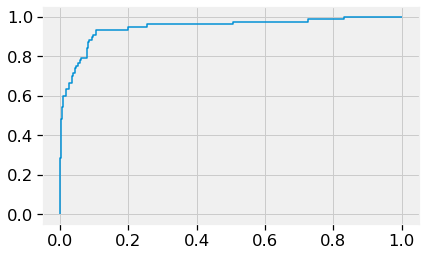

In [32]:
# sklearn ROC 패키지
fpr, tpr, thresholds = metrics.roc_curve(test_y, pred_y, pos_label=1)

# print ROC curve
plt.plot(fpr, tpr)

# print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)

### Feature Selection again & 성능 측정
- 특이하게.. 로지스틱 회귀모형은 cut_off 함수를 지나기 전엔 '회귀' 값을 갖는다.
- 그러니까 변수선택법을 통해 regression 값의 AIC를 최대한 높이고,
- 그 후에 cut_off 함수를 지나게 해본다.

In [33]:
# 위 섹션에 정의된 함수 그대로 사용
    # !!processSubset에서 model만 logit으로 변경!!

def processSubset(X,y, feature_set):
            model = sm.Logit(y,X[list(feature_set)])
            regr = model.fit()
            AIC = regr.aic
            return {"model":regr, "AIC":AIC}

'''
전진선택법
'''
def forward(X, y, predictors):
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y= y, feature_set=predictors+[p]+['const']))
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)

    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

def forward_model(X,y):
    Fmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    # 미리 정의된 데이터 변수
    predictors = []
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X,y=y,predictors=predictors)
        if i > 1:
            if Forward_result['AIC'] > Fmodel_before:
                break
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]["model"].model.exog_names
        Fmodel_before = Fmodels.loc[i]["AIC"]
        predictors = [ k for k in predictors if k != 'const']
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")

    return(Fmodels['model'][len(Fmodels['model'])])


'''
후진소거법
'''
def backward(X,y,predictors):
    tic = time.time()
    results = []

    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results.append(processSubset(X=X, y= y,feature_set=list(combo)+['const']))
    models = pd.DataFrame(results)

    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors) - 1, "predictors in",
          (toc - tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model


def backward_model(X, y):
    Bmodels = pd.DataFrame(columns=["AIC", "model"], index = range(1,len(X.columns)))
    tic = time.time()
    predictors = X.columns.difference(['const'])
    Bmodel_before = processSubset(X,y,predictors)['AIC']
    while (len(predictors) > 1):
        Backward_result = backward(X=train_x, y= train_y, predictors = predictors)
        if Backward_result['AIC'] > Bmodel_before:
            break
        Bmodels.loc[len(predictors) - 1] = Backward_result
        predictors = Bmodels.loc[len(predictors) - 1]["model"].model.exog_names
        Bmodel_before = Backward_result['AIC']
        predictors = [ k for k in predictors if k != 'const']

    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Bmodels['model'].dropna().iloc[0])


'''
단계적 선택법
'''
def stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X,y,predictors+['const'])['AIC']
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X, y=y, predictors=predictors) # constant added
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k != 'const']
        Backward_result = backward(X=X, y=y, predictors=predictors)
        if Backward_result['AIC']< Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [ k for k in predictors if k != 'const']
            print('backward')
        if Stepmodels.loc[i]['AIC']> Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Stepmodels['model'][len(Stepmodels['model'])])

In [34]:
Forward_best_model = forward_model(train_x, train_y)
Backward_best_model = backward_model(train_x, train_y)
stepwise_best_model = stepwise_model(train_x, train_y)

# y-hat
pred_y_full = fitted_logit.predict(test_x)
pred_y_forward = Forward_best_model.predict(test_x[Forward_best_model.model.exog_names])
pred_y_backward = Backward_best_model.predict(test_x[Backward_best_model.model.exog_names])
pred_y_stepwise = stepwise_best_model.predict(test_x[stepwise_best_model.model.exog_names])

Optimization terminated successfully.
         Current function value: 0.329986
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.284217
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.296731
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.330062
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.322763
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.329995
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.327824
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.205738
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.324953
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.329912
  

Optimization terminated successfully.
         Current function value: 0.134831
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.131871
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.218281
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.142684
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.155797
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.135444
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.152482
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.131791
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.131772
         Iterations 9
Processed  9 models on 8 predictors in 0.0709230899810791
Selected predictors: ['C

Optimization terminated successfully.
         Current function value: 0.131803
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.132343
         Iterations 9
Processed  4 models on 8 predictors in 0.02821803092956543
Selected predictors: ['Income', 'Education', 'CD Account', 'Family', 'CreditCard', 'Securities Account', 'Online', 'CCAvg', 'const']  AIC: <statsmodels.discrete.discrete_model.BinaryResultsWrapper object at 0x154f65d90>
forward
Optimization terminated successfully.
         Current function value: 0.132361
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.132650
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.135373
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.136112
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.142716
         Iterations 9

In [35]:
# cut_off 함수 적용
pred_Y_full = cut_off(pred_y_full, 0.5)
pred_Y_forward = cut_off(pred_y_forward, 0.5)
pred_Y_backward = cut_off(pred_y_backward, 0.5)
pred_Y_stepwise = cut_off(pred_y_stepwise, 0.5)

In [36]:
# cfmat 만들기
cfmat_full = confusion_matrix(test_y, pred_Y_full)
cfmat_forward = confusion_matrix(test_y, pred_Y_forward)
cfmat_backward = confusion_matrix(test_y, pred_Y_backward)
cfmat_stepwise = confusion_matrix(test_y, pred_Y_stepwise)

In [37]:
# acc 함수 사용하기
print(acc(cfmat_full))
print(acc(cfmat_forward))
print(acc(cfmat_backward))
print(acc(cfmat_stepwise))

## 추가로 ROC curve와 AUC도 구하면 됌.
    ## 결론: 이 데이터에서 변수선택법을 사용해도 logit regression의 성능이 큰 차이가 없음.

0.9466666666666667
0.944
0.944
0.944
